In [ ]:
!pip install torch torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 58.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.9 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/Data_Augmentation.zip" -d "/content/dataset"


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: /content/dataset/train/REAL/4500 (10).jpg  
  inflating: /content/dataset/train/REAL/4500 (2).jpg  
  inflating: /content/dataset/train/REAL/4500 (3).jpg  
  inflating: /content/dataset/train/REAL/4500 (4).jpg  
  inflating: /content/dataset/train/REAL/4500 (5).jpg  
  inflating: /content/dataset/train/REAL/4500 (6).jpg  
  inflating: /content/dataset/train/REAL/4500 (7).jpg  
  inflating: /content/dataset/train/REAL/4500 (8).jpg  
  inflating: /content/dataset/train/REAL/4500 (9).jpg  
  inflating: /content/dataset/train/REAL/4500.jpg  
  inflating: /content/dataset/train/REAL/4501 (10).jpg  
  inflating: /content/dataset/train/REAL/4501 (2).jpg  
  inflating: /content/dataset/train/REAL/4501 (3).jpg  
  inflating: /content/dataset/train/REAL/4501 (4).jpg  
  inflating: /content/dataset/train/REAL/4501 (5).jpg  
  inflating: /content/dataset/train/REAL/4501 (6).jpg  
  inflating: /content/datase

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import os
import random
from matplotlib import pyplot as plt
import cv2

import numpy as np
import pandas as pd

from keras.utils import image_dataset_from_directory
from keras.models import Sequential
from keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.metrics import Precision, Recall

import keras_tuner as kt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
top_dir = '/content/dataset'
train_dir = top_dir + '/train'
test_dir = top_dir + '/test'

train_real = os.listdir(train_dir + '/REAL')
train_fake = os.listdir(train_dir + '/FAKE')

In [ ]:
import os

# Liste le contenu du dossier décompressé
dataset_folder = '/content/dataset'
print(os.listdir(dataset_folder))


['test', 'train']


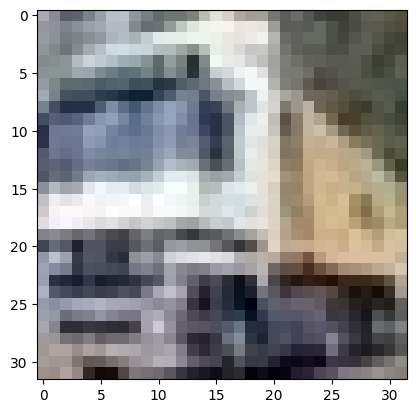

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Remplacez 'exemple.jpg' par le chemin d'une image réelle de votre ensemble de données
image_path = os.path.join(dataset_folder, '/content/dataset/train/REAL/0000 (10).jpg')
image = Image.open(image_path)

# Affichez l'image
plt.imshow(image)
plt.show()


In [ ]:
def plot_im(directory, k):

    files = os.listdir(directory)
    im = random.choices(files, k = k)

    fig = plt.figure()

    for i in range(k):
        im_i = cv2.imread(directory + im[i])
        fig.add_subplot(int(np.sqrt(k)), int(np.sqrt(k)), i + 1)
        plt.imshow(im_i)
        plt.axis('off')

    return plt

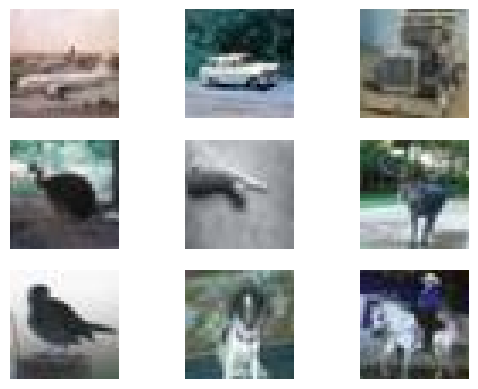

In [ ]:
real_im = plot_im(directory = train_dir + '/REAL/', k = 9)

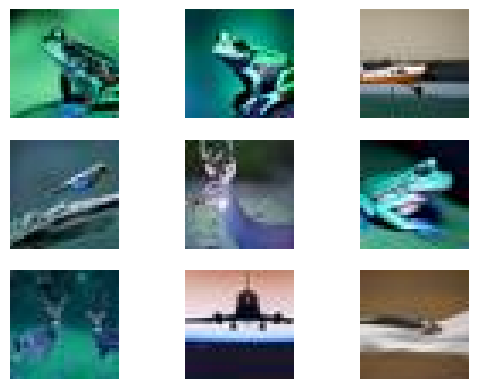

In [ ]:
fake_im = plot_im(directory = train_dir + '/FAKE/', k = 9)

In [ ]:
# Generate tf datasets

train = image_dataset_from_directory(
    train_dir,
    label_mode = 'binary',
    image_size = (32, 32)
)

test = image_dataset_from_directory(
    test_dir,
    label_mode = 'binary',
    image_size = (32, 32)
)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [ ]:
simple_model = Sequential([
    Rescaling(scale = 1./255),
    Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(),
    Conv2D(filters = 64, kernel_size = 3, activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units = 64),
    BatchNormalization(),
    Activation('relu'),
    Dense(units = 1, activation = 'sigmoid')
])

simple_model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy', Precision(), Recall()]
)

simple_model.fit(train, validation_data = test, epochs = 2)

Epoch 1/5
3125/3125 [==============================] - 279s 88ms/step - loss: 0.2798 - accuracy: 0.8826 - precision: 0.8806 - recall: 0.8852 - val_loss: 0.8459 - val_accuracy: 0.7001 - val_precision: 0.6254 - val_recall: 0.9981
Epoch 2/5
3125/3125 [==============================] - 265s 85ms/step - loss: 0.2088 - accuracy: 0.9156 - precision: 0.9141 - recall: 0.9174 - val_loss: 0.7625 - val_accuracy: 0.7527 - val_precision: 0.6697 - val_recall: 0.9971
Epoch 3/5
3125/3125 [==============================] - 242s 77ms/step - loss: 0.1861 - accuracy: 0.9262 - precision: 0.9258 - recall: 0.9267 - val_loss: 0.3647 - val_accuracy: 0.8585 - val_precision: 0.7844 - val_recall: 0.9887
Epoch 4/5
3125/3125 [==============================] - 258s 83ms/step - loss: 0.1689 - accuracy: 0.9324 - precision: 0.9317 - recall: 0.9332 - val_loss: 0.9145 - val_accuracy: 0.7391 - val_precision: 0.6576 - val_recall: 0.9977
Epoch 5/5
3125/3125 [==============================] - 292s 93ms/step - loss: 0.1535 - a

In [ ]:
# Hyperparameter tuning with keras_tuner

def model_builder(hp):

    # Hyperparameters
    dense_units = hp.Int('dense_units', min_value = 16, max_value = 128, step = 16)
    conv2d_filters_0 = hp.Int('conv_filters_0', min_value = 16, max_value = 128, step = 16)
    conv2d_filters_1 = hp.Int('conv_filters_1', min_value = 16, max_value = 128, step = 16)
    dropout_rate = hp.Int('dropout_rate', min_value = 0, max_value = 5, step = 1)
    learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

    model = Sequential([
        Rescaling(scale = 1./255),
        Conv2D(filters = conv2d_filters_0, kernel_size = 3, activation = 'relu'),
        MaxPooling2D(),
        Conv2D(filters = conv2d_filters_1, kernel_size = 3, activation = 'relu'),
        MaxPooling2D(),
        Dropout(rate = dropout_rate/5),
        Flatten(),
        Dense(units = dense_units),
        BatchNormalization(),
        Activation('relu'),
        Dense(units = 1, activation = 'sigmoid')
    ])

    model.compile(
        optimizer = Adam(learning_rate = learning_rate),
        loss = 'binary_crossentropy',
        metrics = ['accuracy', Precision(), Recall()]
    )

    return model

In [ ]:
# Optimize model for validation accuracy

stop_early = EarlyStopping(monitor = 'val_accuracy', patience = 3)

tuner = kt.Hyperband(
    hypermodel = model_builder,
    objective = 'val_accuracy',
    max_epochs = 5,
    factor = 3,
    directory = 'tuning',
    overwrite = True
)

tuner.search(
    train,
    validation_data = test,
    callbacks = [stop_early]
)

Trial 26 Complete [00h 30m 11s]
val_accuracy: 0.9441499710083008

Best val_accuracy So Far: 0.9441499710083008
Total elapsed time: 05h 08m 48s

Search: Running Trial #27

Value             |Best Value So Far |Hyperparameter
80                |112               |dense_units
48                |112               |conv_filters_0
32                |48                |conv_filters_1
2                 |2                 |dropout_rate
0.0001            |0.001             |learning_rate
10                |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
0                 |1                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/10
3125/3125 [==============================] - 152s 48ms/step - loss: 0.3692 - accuracy: 0.8338 - precision: 0.8341 - recall: 0.8332 - val_loss: 0.3877 - val_accuracy: 0.8249 - val_precision: 0.7483 - val_recall: 0.9790
Epoch 2/10
3125/3125 [==============================] - 147s 47ms/step - los

In [ ]:
optimal_hps = tuner.get_best_hyperparameters()[0]
model = tuner.hypermodel.build(optimal_hps)

history = model.fit(
    train,
    validation_data = test,
    epochs = 20,
    callbacks = [stop_early]
)

In [ ]:
model.summary()
model.save('/kaggle/working/')